<a href="https://colab.research.google.com/github/caiogomide/imersao-dados-2021/blob/main/notebooks/aula-2/aula_2_conteudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2. Aula 02 - Estatísticas, visualização de dados e distribuições**

#### 2.1 Importação de Biblioteca e Base de Dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Configuração do seaborn
sns.set()

In [7]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

In [8]:
dados = pd.read_csv(url_dados, compression='zip')

#### 2.2 Renomeando Coluna Droga
*Foi decidido que um melhor nome para a coluna droga seria composto, pois nesta etapa de experimentação não está sendo testadas drogas completas, e sim compostos que serão utilizados no futuro para sintetização de novas drogas.*

In [9]:
dados.rename(columns={'droga':'composto'}, inplace=True)

#### 2.3 Countplot

In [ ]:
#Obtenção dos 5 compostos mais frequentes nos experimentos analisados
compostos_mais_frequentes = dados['composto'].value_counts()[:5].index
#Criação de um dataframe que possui apenas os 5 compostos mais frequentes
df_compostos_frequentes = dados.query('composto in @compostos_mais_frequentes')

Text(0, 0.5, 'Quantidade de Experimentos')

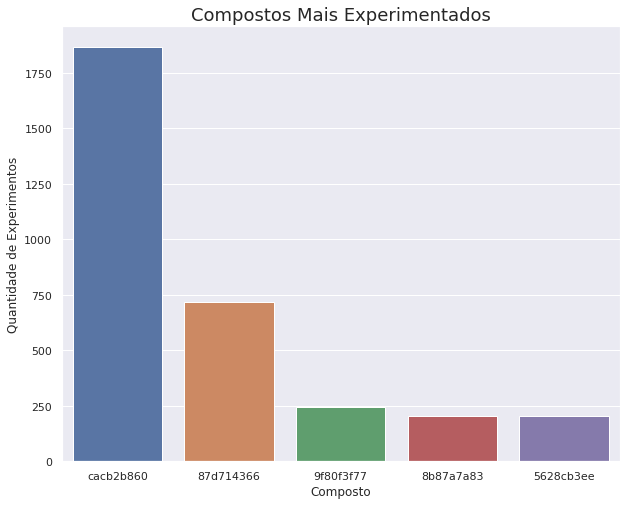

In [ ]:
plt.figure(figsize=(10, 8))
#Criação de gráfico de distribuição de frequências para a variável composto
grafico_compostos_frequentes = sns.countplot(data=df_compostos_frequentes, x='composto', order=compostos_mais_frequentes)
#Configuração de titulo para o gráfico
grafico_compostos_frequentes.set_title('Compostos Mais Experimentados', fontsize=18)
#Configuração de legenda para o eixo x do gráfico
grafico_compostos_frequentes.set_xlabel('Composto')
#Configuração de legenda para o eixo y do gráfico
grafico_compostos_frequentes.set_ylabel('Quantidade de Experimentos')

**Conclusão:** O composto *cacb2b860* apresenta uma frequência desproporcional aos outros compostos, a razão para isto deverá ser estudada.

#### 2.4 Análise da expressão gênica g0

In [17]:
#Renomeação das colunas de expressões gênicas e viabilidade celular, retirando os hifens
dados.columns = dados.columns.str.replace('-','')

In [18]:
#Cálculo limites minimos e máximos da expressão gênica g0
limite_minimo_g_zero = dados['g0'].min()
limite_maximo_g_zero = dados['g0'].max()

**Conclusão:** A expressão gênica do gene 0 após um experimento varia de  **-5.513** até **10.0**

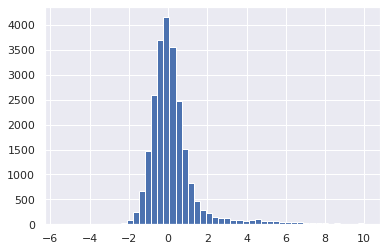

In [13]:
#Criação de histograma da váriavel g0
g_zero = dados['g0'].hist(bins=50)

**Conclusão:** As variações das expressões gênicas do gene 0 se comportam como uma curva assimétrica a direita, a maior parte das variações se concentram entre -0.5 e +0.5

#### 2.5 Plotagem de Dados Quantitativos Contínuos

##### 2.5.1 Expressões Genicas

In [29]:
#Coleta de todos dados das expressões gênicas
dados_expressoes_genicas = dados.loc[:,'g0':'g771']

In [30]:
#Coleta de medidas de tendência central para as expressões gênicas
info_expressoes_genicas = dados_expressoes_genicas.describe().transpose()

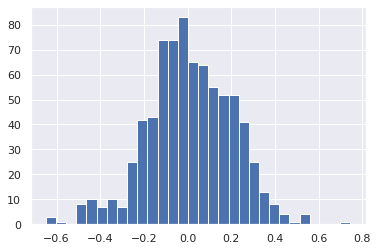

In [38]:
#Criação de histograma com as médias de variação de todas expressões gênicas
distribuicao_medias_expressoes_genicas = info_expressoes_genicas['mean'].hist(bins = 30)
distribuicao_medias_expressoes_genicas

**Conclusão:** A variação média das expressões gênicas dos experimentos se concentram entre -0.2 e 0.2, experimentos que variaram mais estas expressões, como 0.5, 0.6 e 0.8, deverão ser analisados com mais cuidado.

##### 2.5.2 Viabilidade Celular

In [35]:
#Coleta de todos dados de viabilidade celular
dados_viabilidade_celular = dados.loc[:,'c0':'c99']

In [36]:
#Coleta de medidas de tendência central para as viabilidades celulares
info_viabilidade_celular = dados_viabilidade_celular.describe().transpose()

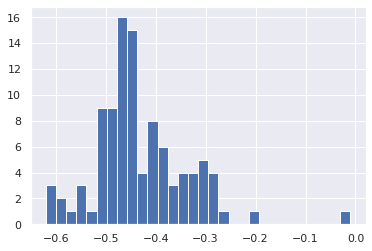

In [37]:
#Criação de histograma com as médias de variação de todas viabilidades celulares
distribuicao_medias_viabilidade_celular = info_viabilidade_celular['mean'].hist(bins=30)
distribuicao_medias_viabilidade_celular

**Conclusão:** A maioria da concentração da variabilidade da viabilidade celular esta concentrada entre -0.6 e -0.2, este valor é esperado pois os compostos idealmente não devem alterar esta propriedade da célula.

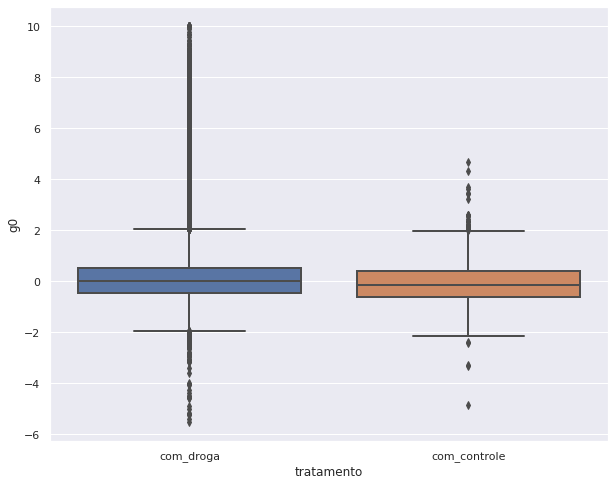

In [ ]:
plt.figure(figsize=(10,8))
#Criação de boxplot de distribuição da variação da expressão gênica do g0 para experimentos com droga e experimentos com controle
sns.boxplot(data=dados, x='tratamento', y='g0', orient='vertical', linewidth='2')

**Conclusão:** Idealmente os experimentos com controle não deveriam alterar a expressão gênica de nenhum gene, os outliers em questão deverão ser estudados com cuidado.Também é possível observar que há uma quantidade razoável de drogas que fizeram efeitos no g0, estas drogas, que são os outliers em questão, deverão ser estudadas em próximas etapas para analisar quais foram os efeitos no experimento.